In [7]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv("/content/cosmicclassifierTraining.csv")

In [9]:
numeric_features = df.select_dtypes(include=["number"]).columns
categorical_features = df.select_dtypes(exclude=["number"]).columns


missing_numeric = df[numeric_features].isnull().sum()
missing_categorical = df[categorical_features].isnull().sum()

print("🔹 Numeric Features Missing Values:")
print(missing_numeric[missing_numeric > 0])

print("\n🔹 Categorical Features Missing Values:")
print(missing_categorical[missing_categorical > 0])

🔹 Numeric Features Missing Values:
Atmospheric Density              2984
Surface Temperature              3032
Gravity                          2984
Water Content                    3077
Mineral Abundance                2921
Orbital Period                   2997
Proximity to Star                2945
Atmospheric Composition Index    2942
Prediction                       3039
dtype: int64

🔹 Categorical Features Missing Values:
Magnetic Field Strength    3058
Radiation Levels           3021
dtype: int64


In [10]:
df_new=df.dropna(subset="Prediction")

In [11]:
df_new[numeric_features] = df_new[numeric_features].fillna(df_new[numeric_features].median())

<ipython-input-11-1e748002c5b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[numeric_features] = df_new[numeric_features].fillna(df_new[numeric_features].median())


In [12]:
df_new[categorical_features] = df_new[categorical_features].fillna(df_new[categorical_features].mode().iloc[0])


<ipython-input-12-6ff23aa4579d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[categorical_features] = df_new[categorical_features].fillna(df_new[categorical_features].mode().iloc[0])


In [13]:
df_new

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,-0.329290,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,Category_9,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,0.050243,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,Category_9,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,Category_9,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.316003,-1.160519,0.544548,-1.407123,1.427861,0.849849,-1.932329,Category_8,Category_5,1.333760,8.0
59996,0.789506,-2.645345,-0.375569,-2.579966,0.783195,0.671547,-2.041189,Category_14,Category_4,0.170505,3.0
59997,-0.662563,0.642230,-1.175106,-2.783240,-0.902704,-1.694373,-1.824274,Category_8,Category_8,1.010311,5.0
59998,0.475118,-0.021458,2.086274,1.444825,-1.986595,-2.113147,-0.348915,Category_11,Category_9,-0.665345,6.0


In [14]:
df_encoded = pd.get_dummies(df_new, columns=categorical_features, drop_first=True)

In [15]:
df_encoded.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Prediction,Magnetic Field Strength_Category_10,...,Radiation Levels_Category_19,Radiation Levels_Category_2,Radiation Levels_Category_20,Radiation Levels_Category_3,Radiation Levels_Category_4,Radiation Levels_Category_5,Radiation Levels_Category_6,Radiation Levels_Category_7,Radiation Levels_Category_8,Radiation Levels_Category_9
0,0.472806,-0.329290,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,0.692907,5.0,False,...,False,False,False,False,False,False,True,False,False,False
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,0.050243,0.0,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,-0.677182,4.0,False,...,False,False,False,False,False,False,False,False,True,False
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,0.109429,1.0,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,0.407941,9.0,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df_encoded.columns

Index(['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star', 'Atmospheric Composition Index', 'Prediction',
       'Magnetic Field Strength_Category_10',
       'Magnetic Field Strength_Category_11',
       'Magnetic Field Strength_Category_12',
       'Magnetic Field Strength_Category_13',
       'Magnetic Field Strength_Category_14',
       'Magnetic Field Strength_Category_15',
       'Magnetic Field Strength_Category_16',
       'Magnetic Field Strength_Category_17',
       'Magnetic Field Strength_Category_18',
       'Magnetic Field Strength_Category_19',
       'Magnetic Field Strength_Category_2',
       'Magnetic Field Strength_Category_20',
       'Magnetic Field Strength_Category_3',
       'Magnetic Field Strength_Category_4',
       'Magnetic Field Strength_Category_5',
       'Magnetic Field Strength_Category_6',
       'Magnetic Field Strength_Category_7',
       'Magnetic Field

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
X = df_encoded.drop("Prediction",axis=1)
y = df_encoded["Prediction"]


if y.dtype == 'object':
    y = y.astype('category').cat.codes

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importance = rf.feature_importances_
mi_importance = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Random Forest Importance": rf_importance,
    "Mutual Information": mi_importance
}).sort_values(by="Random Forest Importance", ascending=False)

print(feature_importance_df)

                                Feature  Random Forest Importance  \
0                   Atmospheric Density              1.478227e-01   
1                   Surface Temperature              1.454715e-01   
3                         Water Content              1.248763e-01   
4                     Mineral Abundance              1.123779e-01   
5                        Orbital Period              1.045814e-01   
6                     Proximity to Star              8.900128e-02   
2                               Gravity              8.281851e-02   
7         Atmospheric Composition Index              6.746981e-02   
25   Magnetic Field Strength_Category_8              8.392467e-03   
24   Magnetic Field Strength_Category_7              8.101327e-03   
26   Magnetic Field Strength_Category_9              6.722235e-03   
23   Magnetic Field Strength_Category_6              6.450098e-03   
9   Magnetic Field Strength_Category_11              6.079509e-03   
44          Radiation Levels_Categ

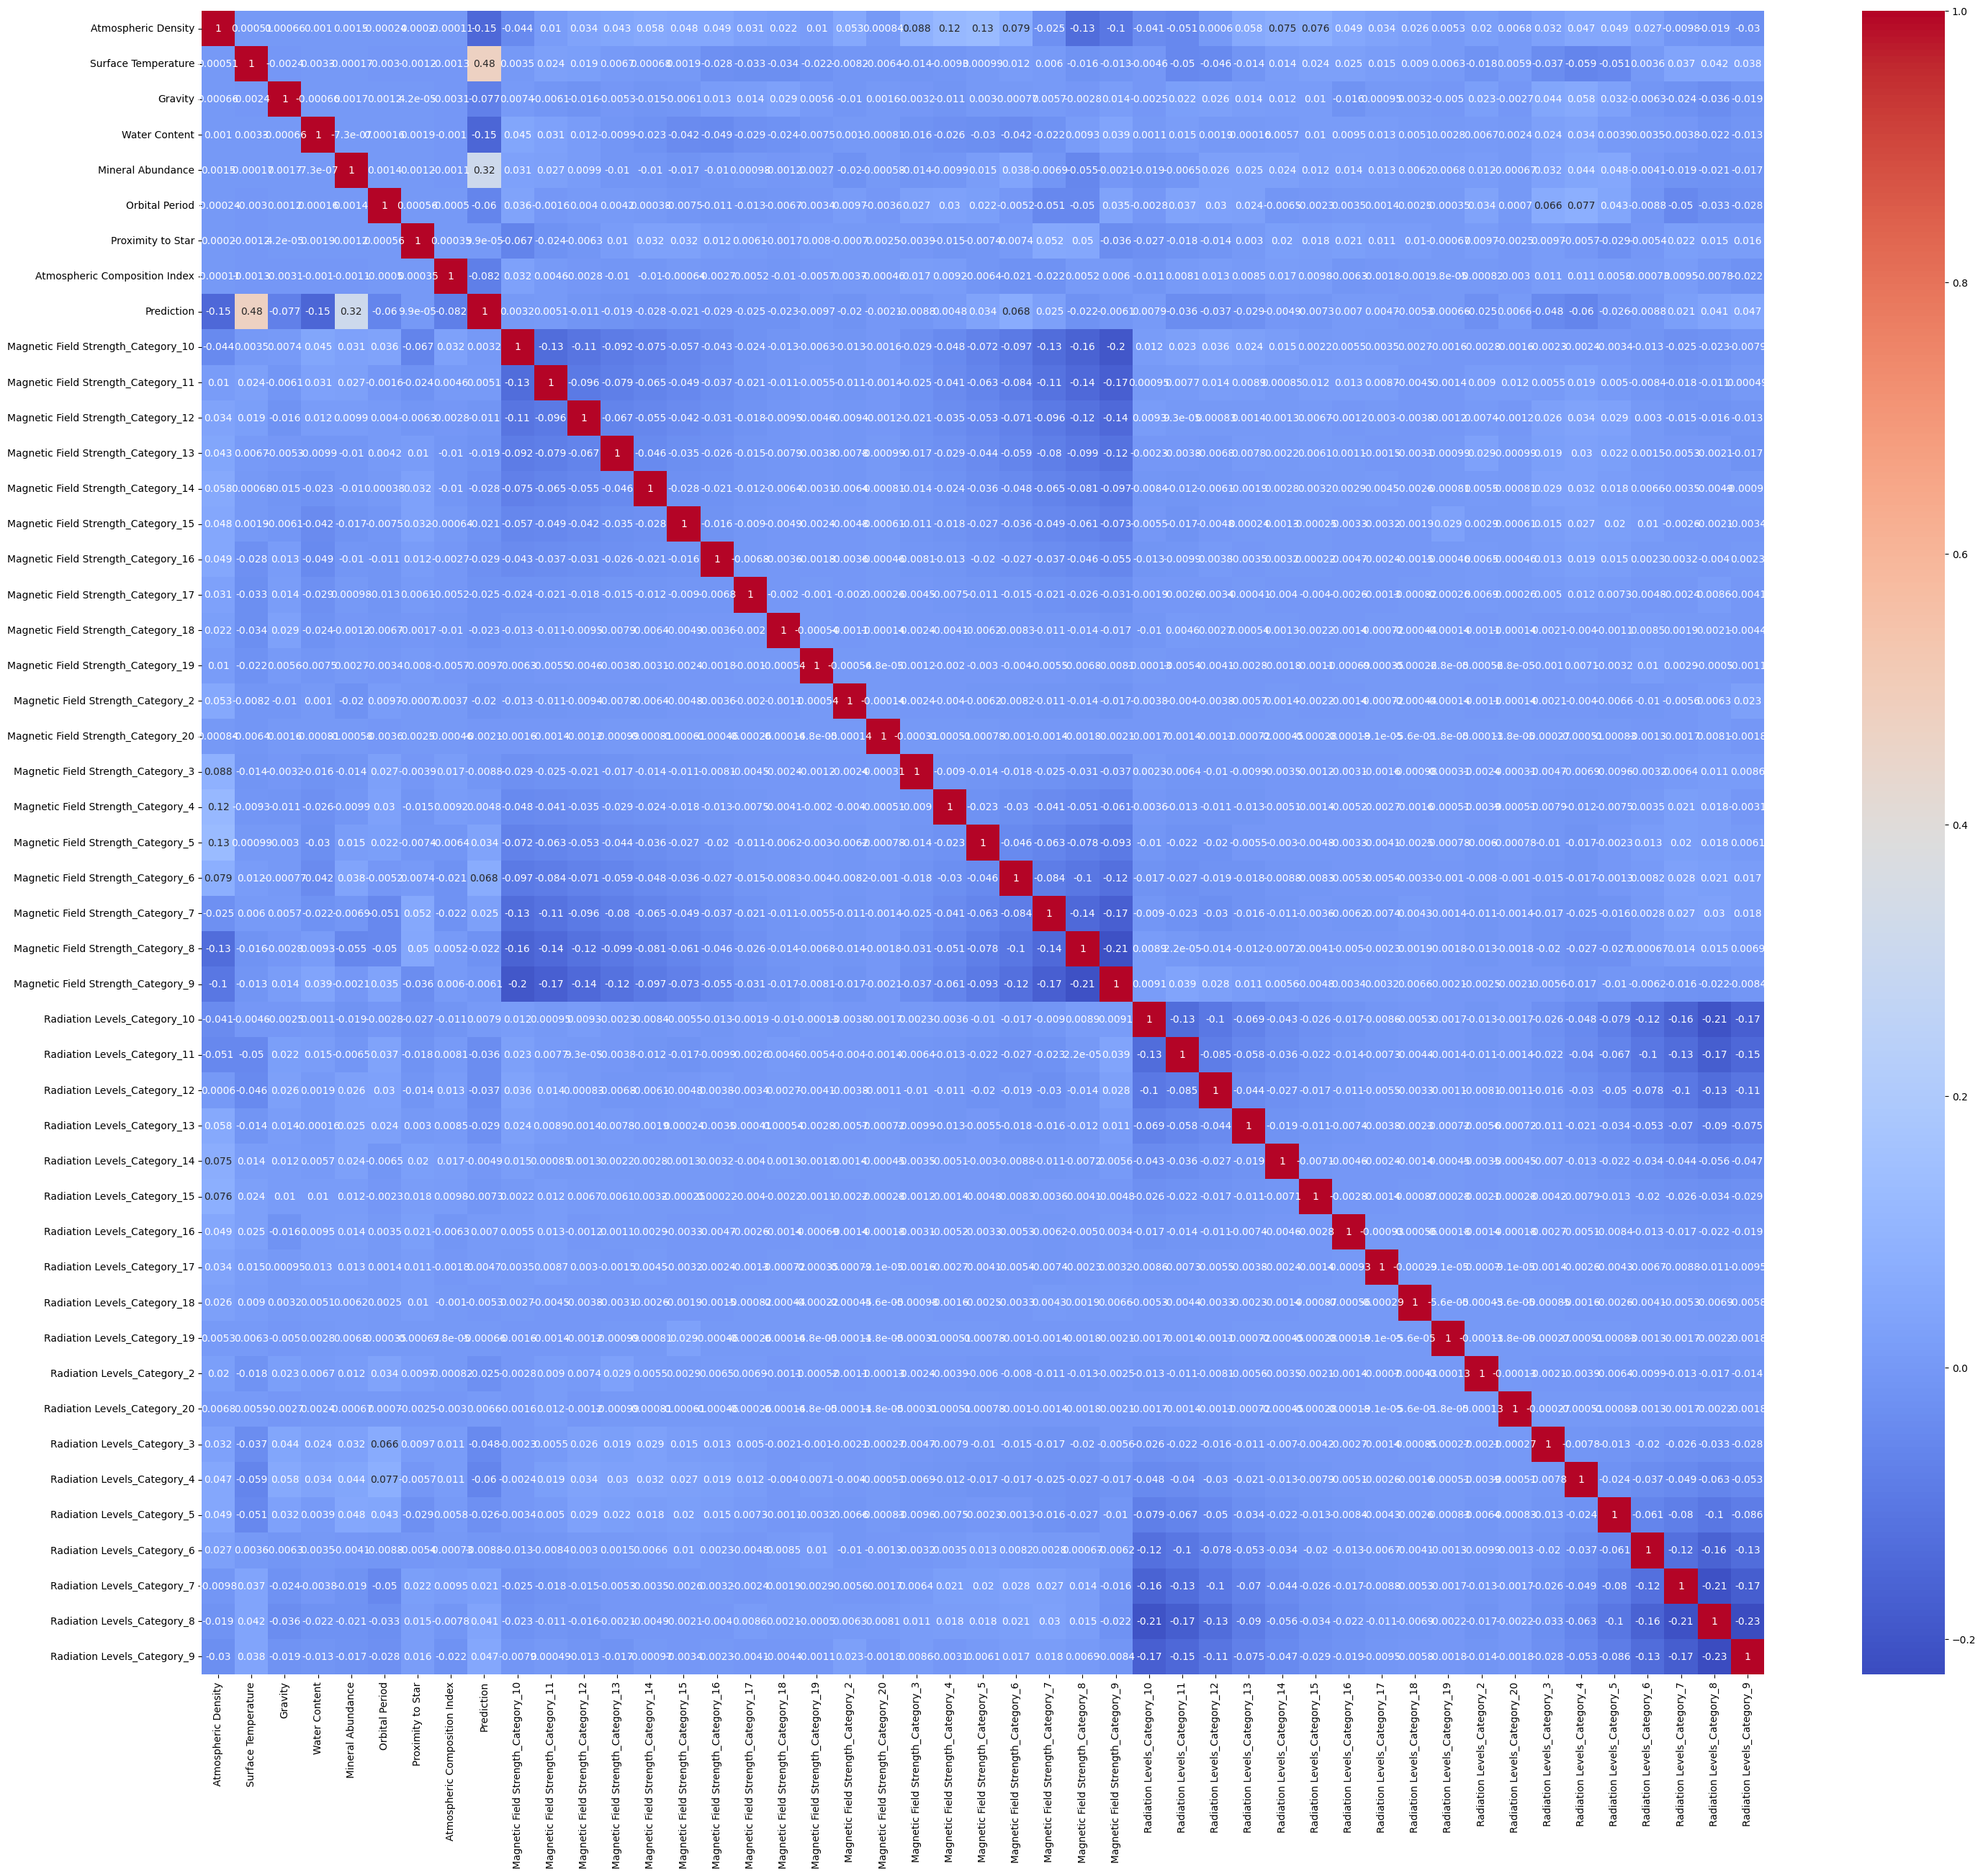

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(35,30))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.show()

You may remove more features using random forest information and Correlation matrix but later .


In [18]:
df_clean = df_encoded.drop(columns=["Radiation Levels_Category_15","Radiation Levels_Category_2","Radiation Levels_Category_3", "Radiation Levels_Category_16", "Radiation Levels_Category_17" ,"Magnetic Field Strength_Category_20","Magnetic Field Strength_Category_10","Magnetic Field Strength_Category_2","Magnetic Field Strength_Category_9","Magnetic Field Strength_Category_3","Radiation Levels_Category_8","Magnetic Field Strength_Category_19","Magnetic Field Strength_Category_8","Magnetic Field Strength_Category_18","Radiation Levels_Category_18","Magnetic Field Strength_Category_17","Magnetic Field Strength_Category_16","Radiation Levels_Category_19",
"Radiation Levels_Category_7","Radiation Levels_Category_10","Radiation Levels_Category_6","Radiation Levels_Category_9"], axis=1)

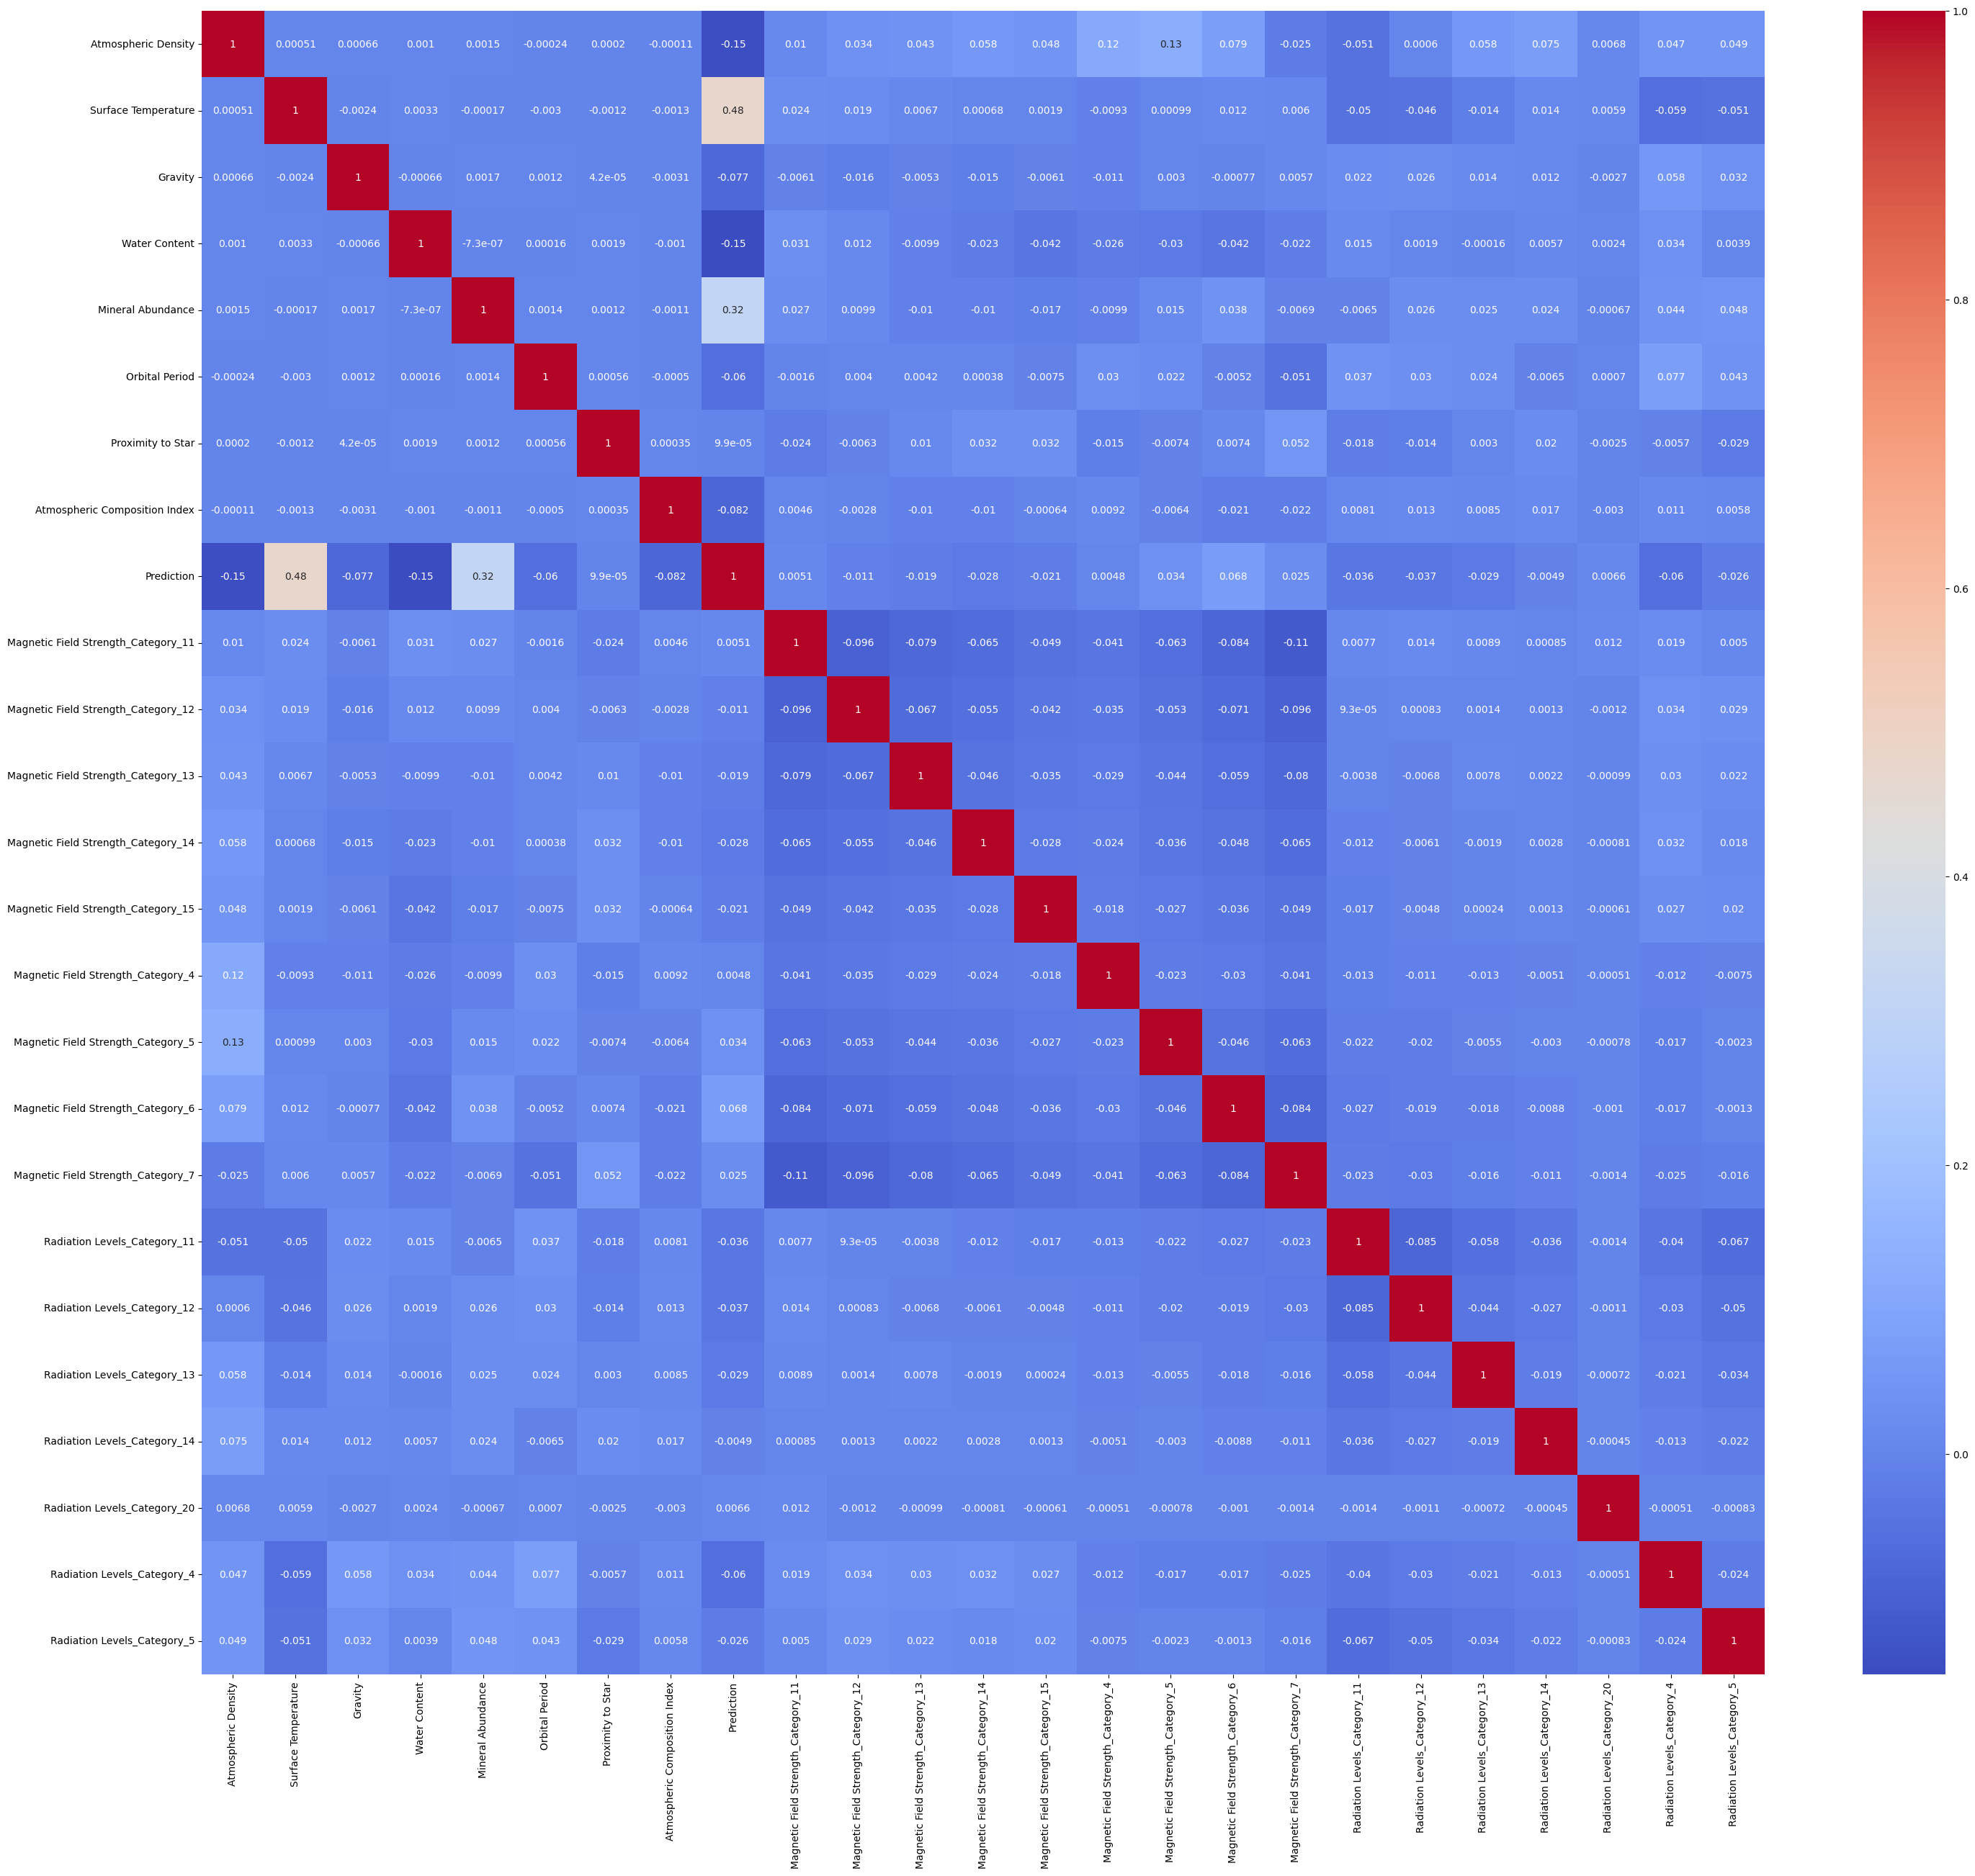

In [19]:
plt.figure(figsize=(35,30))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.show()

Total Noise Points Identified: 337


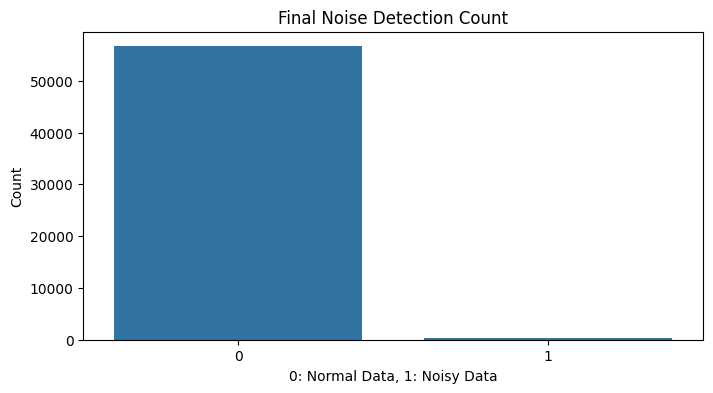

       Atmospheric Density  Surface Temperature   Gravity  Water Content  \
283               6.685847            -1.854145 -0.808459       1.868651   
286               2.525261            -0.226495  0.045905       1.746943   
429               6.770496            -2.170412 -1.358468      -0.003819   
458               6.842370            -1.728046 -2.519528       0.386862   
570               2.491800             1.142585  0.045905       2.069241   
...                    ...                  ...       ...            ...   
59452             7.489252            -2.172387 -2.080169      -0.171593   
59453             2.901234             0.590333 -0.775940       5.627986   
59470             2.492165             1.319332  0.045905       5.039819   
59868             7.327395            -1.107785  3.685256      -1.902792   
59875             0.697228            -1.891559  3.075512       0.910428   

       Mineral Abundance  Orbital Period  Proximity to Star  \
283            -2.847350

In [20]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from scipy.stats import zscore
import joblib

numerical_features = df_clean.select_dtypes(include=[np.number])
X = numerical_features.drop(columns=["Prediction"], errors="ignore")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


df_clean["Noise_IsolationForest"] = 0
df_clean["Noise_ZScore"] = 0
df_clean["Noise_IQR"] = 0
df_clean["Noise_LOF"] = 0
df_clean["Noise_DBSCAN"] = 0

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_clean["Noise_IsolationForest"] = iso_forest.fit_predict(X_scaled)
df_clean["Noise_IsolationForest"] = df_clean["Noise_IsolationForest"].map({1: 0, -1: 1})

z_scores = np.abs(zscore(X_scaled))
df_clean["Noise_ZScore"] = (z_scores > 3).any(axis=1).astype(int)

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean["Noise_IQR"] = outlier_mask.astype(int)

lof = LocalOutlierFactor(n_neighbors=20)
df_clean["Noise_LOF"] = lof.fit_predict(X_scaled)
df_clean["Noise_LOF"] = df_clean["Noise_LOF"].map({1: 0, -1: 1})


dbscan = DBSCAN(eps=1.5, min_samples=5)
df_clean["Noise_DBSCAN"] = dbscan.fit_predict(X_scaled)
df_clean["Noise_DBSCAN"] = df_clean["Noise_DBSCAN"].apply(lambda x: 1 if x == -1 else 0)

df_clean["Final_Noise"] = df_clean[["Noise_IsolationForest", "Noise_ZScore", "Noise_IQR", "Noise_LOF", "Noise_DBSCAN"]].sum(axis=1)
df_clean["Final_Noise"] = (df_clean["Final_Noise"] >= 3).astype(int)

print(f"Total Noise Points Identified: {df_clean['Final_Noise'].sum()}")

plt.figure(figsize=(8, 4))
sns.countplot(x=df_clean["Final_Noise"])
plt.title("Final Noise Detection Count")
plt.xlabel("0: Normal Data, 1: Noisy Data")
plt.ylabel("Count")
plt.show()

noisy_data = df_clean[df_clean["Final_Noise"] == 1]
print(noisy_data)
import joblib


In [40]:
df_clean.columns

Index(['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star', 'Atmospheric Composition Index', 'Prediction',
       'Magnetic Field Strength_Category_11',
       'Magnetic Field Strength_Category_12',
       'Magnetic Field Strength_Category_13',
       'Magnetic Field Strength_Category_14',
       'Magnetic Field Strength_Category_15',
       'Magnetic Field Strength_Category_4',
       'Magnetic Field Strength_Category_5',
       'Magnetic Field Strength_Category_6',
       'Magnetic Field Strength_Category_7', 'Radiation Levels_Category_11',
       'Radiation Levels_Category_12', 'Radiation Levels_Category_13',
       'Radiation Levels_Category_14', 'Radiation Levels_Category_20',
       'Radiation Levels_Category_4', 'Radiation Levels_Category_5',
       'Noise_IsolationForest', 'Noise_ZScore', 'Noise_IQR', 'Noise_LOF',
       'Noise_DBSCAN', 'Final_Noise'],
      dtype='object')

In [50]:
df_cleaned = df_clean[df_clean["Final_Noise"] == 0].drop(columns=["Noise_IsolationForest", "Noise_ZScore", "Noise_IQR", "Noise_LOF", "Noise_DBSCAN", "Final_Noise"])
print(f"Shape after removing noise: {df_cleaned.shape}")
df_cleaned_temp = df_cleaned.drop("Prediction", axis = 1)
scaler=StandardScaler()
df_cleaned_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned_temp),
                                 columns=df_cleaned_temp.columns,
                                 index=df_cleaned_temp.index)
df_cleaned_scaled["Prediction"] = df_cleaned["Prediction"]

scaler = joblib.dump(scaler,"scaler.pkl")

Shape after removing noise: (56624, 25)


In [22]:
df_cleaned_temp

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Magnetic Field Strength_Category_11,Magnetic Field Strength_Category_12,...,Magnetic Field Strength_Category_5,Magnetic Field Strength_Category_6,Magnetic Field Strength_Category_7,Radiation Levels_Category_11,Radiation Levels_Category_12,Radiation Levels_Category_13,Radiation Levels_Category_14,Radiation Levels_Category_20,Radiation Levels_Category_4,Radiation Levels_Category_5
0,0.472806,-0.329290,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,0.692907,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,0.050243,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,-0.677182,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,0.109429,False,False,...,False,False,False,True,False,False,False,False,False,False
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,0.407941,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.316003,-1.160519,0.544548,-1.407123,1.427861,0.849849,-1.932329,1.333760,False,False,...,False,False,False,False,False,False,False,False,False,True
59996,0.789506,-2.645345,-0.375569,-2.579966,0.783195,0.671547,-2.041189,0.170505,False,False,...,False,False,False,False,False,False,False,False,True,False
59997,-0.662563,0.642230,-1.175106,-2.783240,-0.902704,-1.694373,-1.824274,1.010311,False,False,...,False,False,False,False,False,False,False,False,False,False
59998,0.475118,-0.021458,2.086274,1.444825,-1.986595,-2.113147,-0.348915,-0.665345,True,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_clean = df_cleaned_scaled.drop(columns=["Prediction"])
y_clean = df_cleaned_scaled["Prediction"]
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



Accuracy after noise removal: 0.8631346578366446


In [28]:
y_pred = rf.predict(X_test)
print("Accuracy after noise removal:", accuracy_score(y_test, y_pred))

Accuracy after noise removal: 0.8631346578366446


In [24]:
!pip install optuna
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score


def objective(trial):

    hidden_layer_sizes = (
        trial.suggest_int("layer1", 50, 200),
        trial.suggest_int("layer2", 20, 100)
    )
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-4, 1e-2)


    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha,
                        learning_rate_init=learning_rate_init, max_iter=100, random_state=42)
    mlp.fit(X_train, y_train)


    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)


best_params = study.best_params
print("Best Hyperparameters:", best_params)

best_mlp = MLPClassifier(hidden_layer_sizes=(best_params["layer1"], best_params["layer2"]),
                         alpha=best_params["alpha"],
                         learning_rate_init=best_params["learning_rate_init"],
                         max_iter=200, random_state=42)

best_mlp.fit(X_train, y_train)


y_pred_best = best_mlp.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Final MLP Accuracy: {final_accuracy:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.5 MB/s eta 0:00:00


[I 2025-02-28 18:21:33,101] A new study created in memory with name: no-name-bb8a46ec-749c-4a2d-8656-cb686835b88e
<ipython-input-24-9e9bb8f46cbe>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
<ipython-input-24-9e9bb8f46cbe>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-02-28 18:22:14,909] Trial 0 f

Best Hyperparameters: {'layer1': 122, 'layer2': 70, 'alpha': 0.07018248286870923, 'learning_rate_init': 0.00031691803980297815}
Final MLP Accuracy: 0.8788


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
import optuna
from xgboost import XGBClassifier

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500, step=50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, step=0.01),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0, step=0.1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0, step=0.1),
        "gamma": trial.suggest_float("gamma", 0, 5, step=0.5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5, step=0.5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5, step=0.5),
        "tree_method": "gpu_hist",
    }

    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return accuracy_score(y_test, preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best Hyperparameters:", best_params)


final_model = XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

print(f"Final XGBoost Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")


[I 2025-02-28 18:41:08,604] A new study created in memory with name: no-name-62e3d4d1-6224-4d36-812a-20e302024417
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:41:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:41:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:41:15] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might le

✅ Best Hyperparameters: {'n_estimators': 500, 'learning_rate': 0.11, 'max_depth': 6, 'subsample': 0.9, 'colsample_bytree': 0.6, 'gamma': 0.0, 'reg_alpha': 1.5, 'reg_lambda': 0.0}
🚀 Final XGBoost Accuracy: 0.8814


In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

stack_clf = StackingClassifier(
    estimators=[('rf', rf ), ('mlp', best_mlp), ('xgb', final_model)],
    final_estimator=LogisticRegression(),
    stack_method='auto'
)

stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)

accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Accuracy with Stacking: {accuracy_stack:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

🔹 Accuracy with Stacking: 0.8882


In [ ]:
joblib.dump(stack_clf, "stack_classifier.pkl")

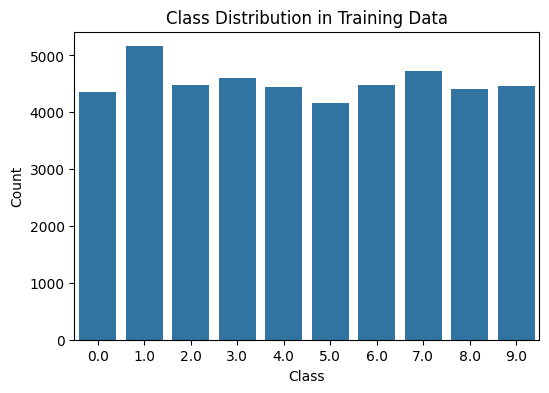

Class Distribution:
Prediction
1.0    11.390980
7.0    10.443939
3.0    10.165787
6.0     9.894258
2.0     9.887635
9.0     9.834654
4.0     9.812579
8.0     9.752975
0.0     9.613899
5.0     9.203294
Name: count, dtype: float64


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = y_train.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()

print(f"Class Distribution:\n{class_counts / len(y_train) * 100}")

In [55]:
test_data = pd.read_csv("/content/cosmicclassifierTest.csv")

In [57]:
numeric_features_test = test_data.select_dtypes(include=["number"]).columns
categorical_features_test = test_data.select_dtypes(exclude=["number"]).columns

In [58]:
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features_test, drop_first=True)

In [59]:
test_data_encoded.columns

Index(['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star', 'Atmospheric Composition Index',
       'Magnetic Field Strength_Category_1',
       'Magnetic Field Strength_Category_10',
       'Magnetic Field Strength_Category_11',
       'Magnetic Field Strength_Category_12',
       'Magnetic Field Strength_Category_13',
       'Magnetic Field Strength_Category_14',
       'Magnetic Field Strength_Category_15',
       'Magnetic Field Strength_Category_16',
       'Magnetic Field Strength_Category_17',
       'Magnetic Field Strength_Category_18',
       'Magnetic Field Strength_Category_19',
       'Magnetic Field Strength_Category_2',
       'Magnetic Field Strength_Category_3',
       'Magnetic Field Strength_Category_4',
       'Magnetic Field Strength_Category_5',
       'Magnetic Field Strength_Category_6',
       'Magnetic Field Strength_Category_7',
       'Magnetic Field Strength_Categ

In [60]:
test_data_clean = test_data_encoded.drop(columns=["Radiation Levels_Category_15","Radiation Levels_Category_2","Radiation Levels_Category_3", "Radiation Levels_Category_16", "Radiation Levels_Category_17","Magnetic Field Strength_Category_10","Magnetic Field Strength_Category_1","Magnetic Field Strength_Category_2","Magnetic Field Strength_Category_9","Magnetic Field Strength_Category_3","Radiation Levels_Category_8","Magnetic Field Strength_Category_19","Magnetic Field Strength_Category_8","Magnetic Field Strength_Category_18","Radiation Levels_Category_18","Magnetic Field Strength_Category_17","Magnetic Field Strength_Category_16",
"Radiation Levels_Category_7","Radiation Levels_Category_10","Radiation Levels_Category_6","Radiation Levels_Category_9"], axis=1)

In [61]:
test_data_clean.columns

Index(['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star', 'Atmospheric Composition Index',
       'Magnetic Field Strength_Category_11',
       'Magnetic Field Strength_Category_12',
       'Magnetic Field Strength_Category_13',
       'Magnetic Field Strength_Category_14',
       'Magnetic Field Strength_Category_15',
       'Magnetic Field Strength_Category_4',
       'Magnetic Field Strength_Category_5',
       'Magnetic Field Strength_Category_6',
       'Magnetic Field Strength_Category_7', 'Radiation Levels_Category_11',
       'Radiation Levels_Category_12', 'Radiation Levels_Category_13',
       'Radiation Levels_Category_14', 'Radiation Levels_Category_4',
       'Radiation Levels_Category_5'],
      dtype='object')

In [64]:
test_data_clean["Radiation Levels_Category_20"] = 0
test_data_clean = test_data_clean[X_train.columns]

In [67]:
scaler = joblib.load("scaler.pkl")
test_data_scaled = pd.DataFrame(scaler.transform(test_data_clean))
test_data_scaled.columns = X_train.columns

In [68]:
test_data_scaled.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Magnetic Field Strength_Category_11,Magnetic Field Strength_Category_12,...,Magnetic Field Strength_Category_5,Magnetic Field Strength_Category_6,Magnetic Field Strength_Category_7,Radiation Levels_Category_11,Radiation Levels_Category_12,Radiation Levels_Category_13,Radiation Levels_Category_14,Radiation Levels_Category_20,Radiation Levels_Category_4,Radiation Levels_Category_5
0,-0.582864,1.559349,-0.097514,-0.743829,-1.250797,0.651276,1.220517,-0.670030,-0.336679,-0.285226,...,-0.185672,-0.247766,-0.337101,-0.333713,-0.251122,-0.171399,-0.107341,-0.004202,-0.12107,-0.19905
1,0.056464,-1.977389,-0.342839,0.950557,-0.131283,-1.250261,0.870951,-0.313914,2.970190,-0.285226,...,-0.185672,-0.247766,-0.337101,-0.333713,-0.251122,-0.171399,-0.107341,-0.004202,-0.12107,-0.19905
2,-1.694545,-0.887870,0.145926,0.619779,-1.348379,0.239165,-0.062602,-0.489060,-0.336679,-0.285226,...,-0.185672,-0.247766,-0.337101,-0.333713,-0.251122,-0.171399,-0.107341,-0.004202,-0.12107,-0.19905
3,2.253926,0.241196,0.564894,-0.235601,-0.528358,-1.290444,2.152057,-0.188808,-0.336679,-0.285226,...,-0.185672,-0.247766,-0.337101,-0.333713,-0.251122,-0.171399,-0.107341,-0.004202,-0.12107,-0.19905
4,0.361808,1.490382,-0.653650,1.505882,-0.379253,0.603809,-1.513369,0.700332,2.970190,-0.285226,...,-0.185672,-0.247766,-0.337101,-0.333713,-0.251122,-0.171399,-0.107341,-0.004202,-0.12107,-0.19905


In [69]:
final_predictions = stack_clf.predict(test_data_scaled)

In [70]:
final_predictions

array([7., 2., 1., ..., 4., 5., 6.])

In [74]:
submission = pd.DataFrame({
    "ID": test_data_scaled.index,
    "Prediction": final_predictions
})
submission.to_csv("predictions.csv", index=False)

print("Predictions saved successfully")


Predictions saved successfully
